# Description of project

Customer behavior and booking possibilities have been radically changed by online hotel reservation channels. Cancellations or no-shows cause a significant number of hotel reservations to be canceled. Cancellations can be caused by a variety of factors, such as scheduling conflicts, changes in plans, etc. In many cases, this is made easier by the possibility of doing so free or at a low cost, which is beneficial for hotel guests but less desirable and possibly revenue-diminishing for hotels.

**The purpose of case study is:**

As a Data Scientist, your job is to build a Machine Learning model to help the Hotel Owners better understand if the customer is going to honor the reservation or cancel it ?

**Dataset Description:**
The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below
* `id`: unique identifier of each booking
* `no_of_adults`: Number of adults
* `no_of_children`: Number of Children
* `no_of_weekend_nights`: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* `no_of_week_nights`: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* `type_of_meal_plan`: Type of meal plan booked by the customer:
* `required_car_parking_space`: Does the customer require a car parking space? (0 - No, 1- Yes)
* `room_type_reserved`: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* `lead_time`: Number of days between the date of booking and the arrival date
* `arrival_year`: Year of arrival date
* `arrival_month`: Month of arrival date
* `arrival_date`: Date of the month
* `market_segment_type`: Market segment designation.
* `repeated_guest`: Is the customer a repeated guest? (0 - No, 1- Yes)
* `no_of_previous_cancellations`: Number of previous bookings that were canceled by the customer prior to the current booking
* `no_of_previous_bookings_not_canceled`: Number of previous bookings not canceled by the customer prior to the current booking
* `avg_price_per_room`: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* `no_of_special_requests`: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* `booking_status`: Flag indicating if the booking was canceled or not.

The dataset was downloaded from:
[Kaggle - Playground Series - Season 3, Episode 7](https://www.kaggle.com/competitions/playground-series-s3e7/overview)

# Exploratory data analysis

## Tools and dataset

### Libraries

In [250]:
# Importing needed libraries

# data manipulation
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt


### Downloading datasets

In [251]:
# Path to dataset
PATH_DATASET_train = r'PG_Dataset\train.csv'
PATH_DATASET_test = r'PG_Dataset\test.csv'

# Download dataset
df_raw = pd.read_csv(PATH_DATASET_train, sep=',')
df_test = pd.read_csv(PATH_DATASET_test, sep=',')

In [252]:
FEATURES_TO_DROP = [] # The container for names of features that will drop out from the dataset
CATEGORICAL_FEATURES = [] # The container for names of features that will be treated as categorical ones during analysis 

### Functions

In [253]:
def First_looking_on_feature(nameOfColumn):
    print(f'''Unique data:\n
    {nameOfColumn.unique()}''')
    print('-'*100)
    
    print('Histogram')
    plt.hist(nameOfColumn)
    plt.show()
    print('-'*100)
    
    print('Value counts\n')
    print(f'{nameOfColumn.value_counts()}')
    print('-'*100)
    
def Sns_count_plot(nameOfColumn):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=nameOfColumn, hue='booking_status', data=df_raw)
    plt.legend(['cancelled', 'honored'], loc='upper right')
    plt.show()

## Data preparation

In [254]:
df_raw.head().T

,0,1,2,3,4
id,0.0,1.00,2.0,3.0,4.0
no_of_adults,2.0,2.00,2.0,1.0,2.0
no_of_children,0.0,0.00,0.0,0.0,0.0
no_of_weekend_nights,0.0,1.00,0.0,0.0,1.0
no_of_week_nights,2.0,2.00,1.0,2.0,0.0
type_of_meal_plan,1.0,0.00,0.0,1.0,0.0
required_car_parking_space,0.0,0.00,0.0,0.0,0.0
room_type_reserved,0.0,0.00,0.0,0.0,0.0
lead_time,9.0,117.00,315.0,32.0,258.0
arrival_year,2018.0,2018.00,2018.0,2018.0,2018.0


In [255]:
df_raw.shape # There are 42100 of rows and 19 of columns

(42100, 19)

In [256]:
df_raw.columns

Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [257]:
df_raw.info()
# There are only the numerical datas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [258]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
id,42100.0,21049.500000,12153.367503,0.0,10524.75,21049.50,31574.25,42099.0
no_of_adults,42100.0,1.920713,0.524950,0.0,2.00,2.00,2.00,4.0
no_of_children,42100.0,0.141093,0.450128,0.0,0.00,0.00,0.00,9.0
no_of_weekend_nights,42100.0,0.884632,0.885693,0.0,0.00,1.00,2.00,7.0
no_of_week_nights,42100.0,2.398005,1.427330,0.0,1.00,2.00,3.00,17.0
type_of_meal_plan,42100.0,0.239192,0.587674,0.0,0.00,0.00,0.00,3.0
required_car_parking_space,42100.0,0.025249,0.156884,0.0,0.00,0.00,0.00,1.0
room_type_reserved,42100.0,0.428931,0.832605,0.0,0.00,0.00,1.00,6.0
lead_time,42100.0,103.888029,81.069343,0.0,37.00,93.00,155.00,443.0
arrival_year,42100.0,2017.856295,0.350795,2017.0,2018.00,2018.00,2018.00,2018.0


In [259]:
df_raw.isna().sum() # Data are complete. Lack of NaN.

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

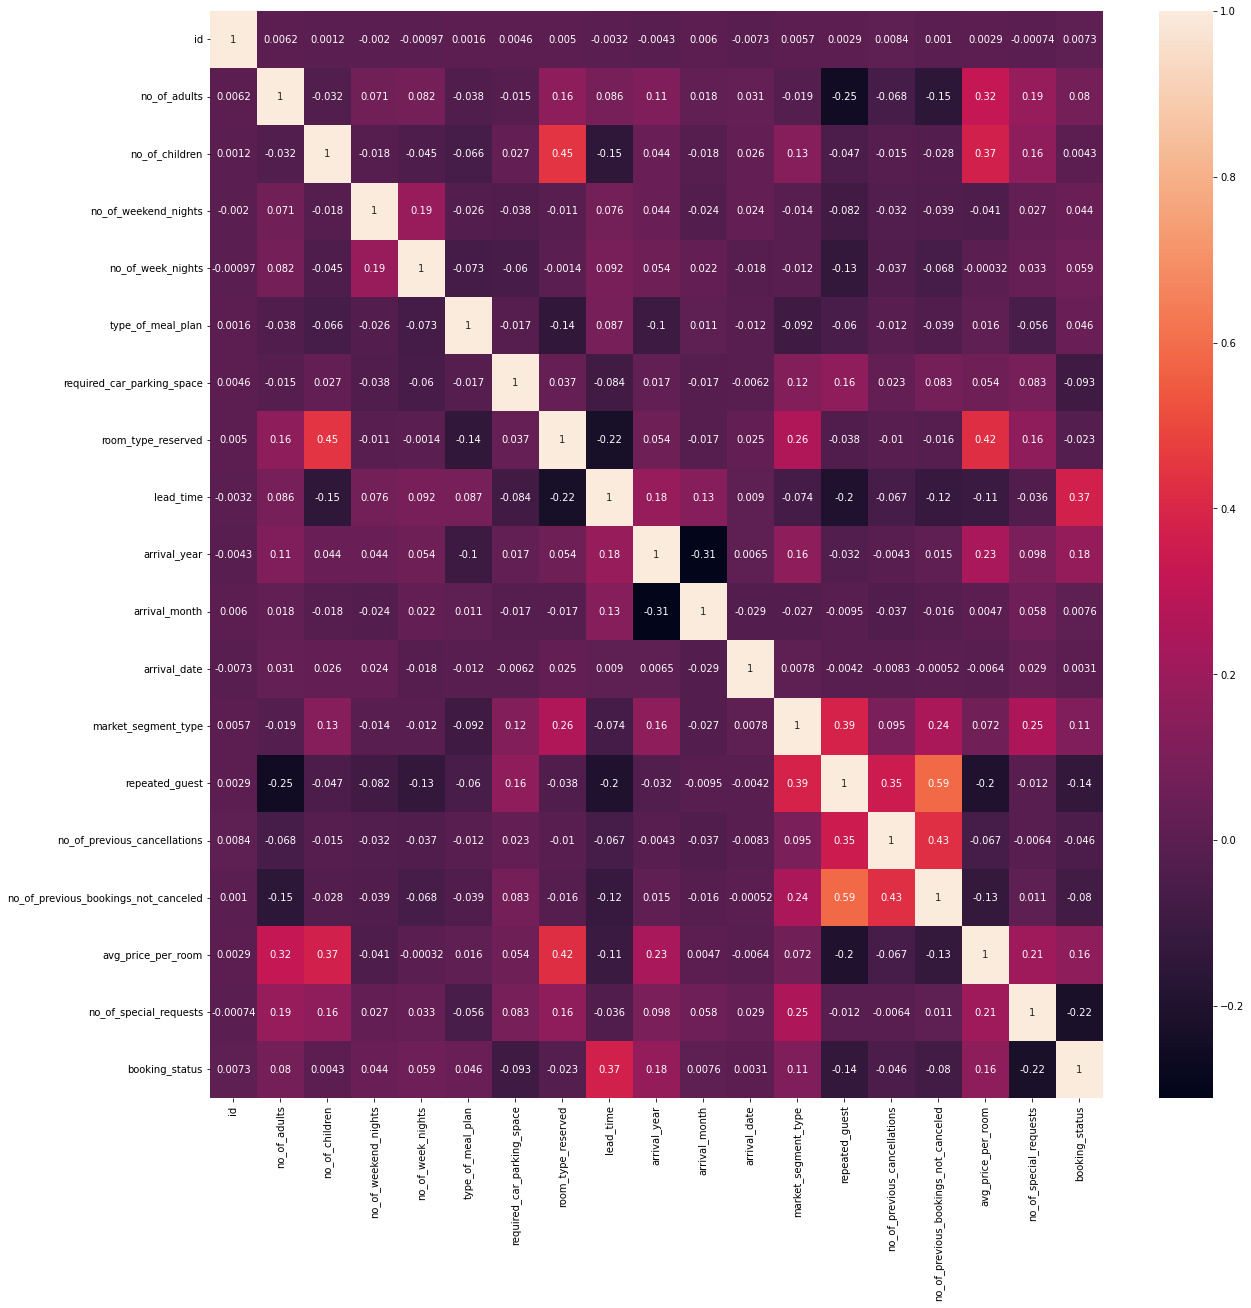

In [260]:
plt.figure(figsize=(20,20))
sns.heatmap(df_raw.corr(), annot=True)
plt.show()

A small correlation is noticed between `no_of_previous_bookings_not_canceled`, `repeated_guest`, and `no_of_previous_cancellations` - it is a chance to drop one of these features.

### Analysis of variables

#### ID

In [261]:
# 'Id' feature is useless
FEATURES_TO_DROP.append('id')
FEATURES_TO_DROP

['id']

**Summary**

`Id` is useless and insignificant

#### No of adults

Unique data:

    [2 1 0 3 4]
----------------------------------------------------------------------------------------------------
Histogram


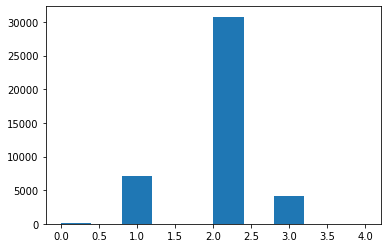

----------------------------------------------------------------------------------------------------
Value counts

2    30771
1     7089
3     4061
0      167
4       12
Name: no_of_adults, dtype: int64
----------------------------------------------------------------------------------------------------


In [262]:
First_looking_on_feature(df_raw['no_of_adults'])

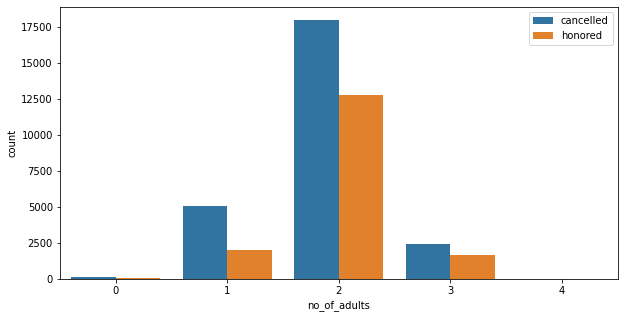

In [263]:
Sns_count_plot('no_of_adults')

0 adults are looking strange. It is possible that parents decided to book a separate room for children or it is a mistake.
4 adults is a small group. 

0 will be adding to 2 group because it is more possible this group booked such the accomodation 

4 will be adding to 3 group. It is one group, i.e. 3 or more

In [264]:
df_raw['no_of_adults'] = df_raw.no_of_adults.apply(lambda source: 3 if source == 4 else (2 if source == 0 else source))
df_raw['no_of_adults'].value_counts(dropna=False)

2    30938
1     7089
3     4073
Name: no_of_adults, dtype: int64

In [265]:
CATEGORICAL_FEATURES.append('no_of_adults')
CATEGORICAL_FEATURES

['no_of_adults']

**Summary**

`No of adults` looks 'OK'

 

#### No of children

Unique data:

    [0 2 1 3 4 9]
----------------------------------------------------------------------------------------------------
Histogram


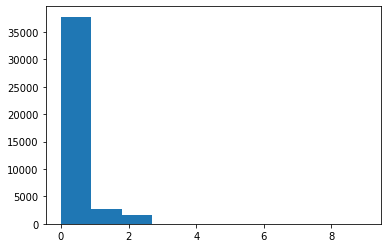

----------------------------------------------------------------------------------------------------
Value counts

0    37786
1     2729
2     1561
3       17
4        5
9        2
Name: no_of_children, dtype: int64
----------------------------------------------------------------------------------------------------


In [266]:
First_looking_on_feature(df_raw['no_of_children'])

In [267]:
df_raw['no_of_children'].unique()

array([0, 2, 1, 3, 4, 9], dtype=int64)

In [268]:
df_raw['no_of_children'] = df_raw.no_of_children.apply(lambda source: 0 if source == 0 else 1)
df_raw['no_of_children'].value_counts()

0    37786
1     4314
Name: no_of_children, dtype: int64

**Summary**

`No of children` demanded changing


More adults visited the hotel without children. Only a small group of adult guests booked with children, so it was proper to make only two groups like 0 without children and 1 with children 

#### No of weekend nights

Unique data:

    [0 1 2 3 5 6 4 7]
----------------------------------------------------------------------------------------------------
Histogram


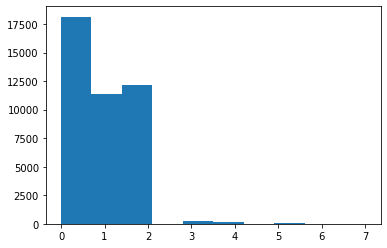

----------------------------------------------------------------------------------------------------
Value counts

0    18137
2    12143
1    11389
3      239
4      128
5       46
6       17
7        1
Name: no_of_weekend_nights, dtype: int64
----------------------------------------------------------------------------------------------------


In [269]:
First_looking_on_feature(df_raw['no_of_weekend_nights'])

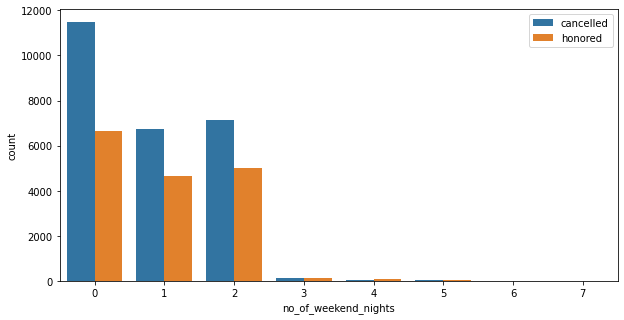

In [270]:
Sns_count_plot('no_of_weekend_nights')

3, 4, 5, 6, 7 numbers of weekend nights are nonmeaningful so it can add it to 2 no of weekend nights

In [271]:
df_raw['no_of_weekend_nights'] = df_raw.no_of_weekend_nights.apply(lambda source: 2 if source > 2 else source)
df_raw.groupby('no_of_weekend_nights')['id'].count()

no_of_weekend_nights
0    18137
1    11389
2    12574
Name: id, dtype: int64

In [272]:
CATEGORICAL_FEATURES.append('no_of_weekend_nights')
CATEGORICAL_FEATURES

['no_of_adults', 'no_of_weekend_nights']

**Summary**

Description of variables of `no of weekend nights`:

* 0 - 0 `no of weekend nights`
* 1 - 1 `no of weekend nights`
* 2 - 2 or more `no of weekend nights`

#### No of week nights

Unique data:

    [ 2  1  0  5  3  4  7  6  8 10 11  9 12 15 17 13 16 14]
----------------------------------------------------------------------------------------------------
Histogram


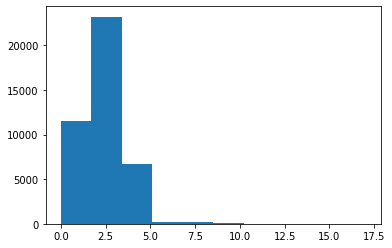

----------------------------------------------------------------------------------------------------
Value counts

2     12905
3     10286
1      9558
4      4175
5      2573
0      1937
6       237
7       160
8        84
10       82
9        53
11       16
15       11
12        9
13        5
16        4
14        3
17        2
Name: no_of_week_nights, dtype: int64
----------------------------------------------------------------------------------------------------


In [273]:
First_looking_on_feature(df_raw['no_of_week_nights'])

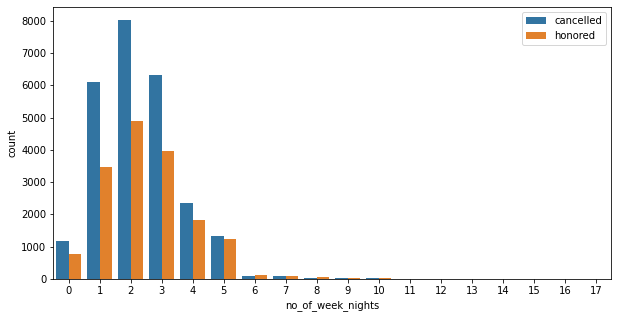

In [274]:
Sns_count_plot('no_of_week_nights')

This same case as `no_of_weekend_nights` but here we will limit data till 5 no_of_week_nights

In [275]:
df_raw['no_of_week_nights'] = df_raw.no_of_week_nights.apply(lambda source: 5 if source > 5 else source)
df_raw['no_of_week_nights'].value_counts()

2    12905
3    10286
1     9558
4     4175
5     3239
0     1937
Name: no_of_week_nights, dtype: int64

In [276]:
CATEGORICAL_FEATURES.append('no_of_week_nights')
CATEGORICAL_FEATURES

['no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights']

**Summary**

Description of variables of `no of week nights`:

* 0 - 0 `no of week nights`
* 1 - 1 `no of week nights`
* 2 - 2 `no of week nights`
* 3 - 3 `no of week nights`
* 4 - 4 `no of week nights`
* 5 - 5 and more `no of week nights`

#### Type of meal plan

Unique data:

    [1 0 2 3]
----------------------------------------------------------------------------------------------------
Histogram


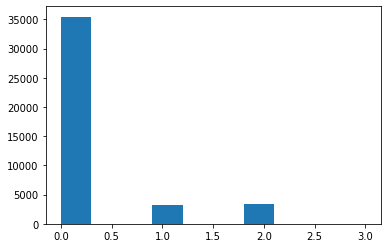

----------------------------------------------------------------------------------------------------
Value counts

0    35463
2     3421
1     3210
3        6
Name: type_of_meal_plan, dtype: int64
----------------------------------------------------------------------------------------------------


In [277]:
First_looking_on_feature(df_raw['type_of_meal_plan'])

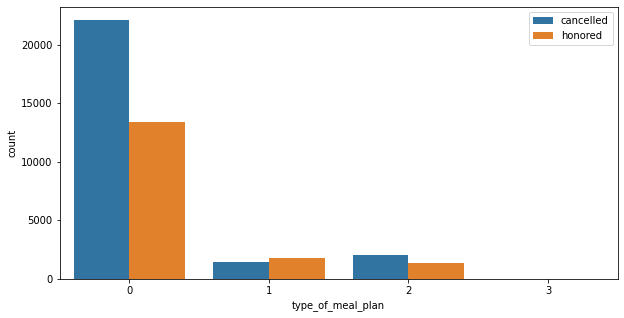

In [278]:
Sns_count_plot('type_of_meal_plan')

We have one significant group. It is a group of guests who resigned deciding of type of meal plan.

We can segment these variables into 0 and 1 where:
* 0 means without `type of meal plan`
* 1 means with `type of meal plan`

In [279]:
df_raw['type_of_meal_plan'] = df_raw.type_of_meal_plan.apply(lambda source: 1 if source > 1 else source)
df_raw['type_of_meal_plan'].value_counts()

0    35463
1     6637
Name: type_of_meal_plan, dtype: int64

**Summary**

`Type of meal plan` looks 'OK'

#### Required car parking space

Unique data:

    [0 1]
----------------------------------------------------------------------------------------------------
Histogram


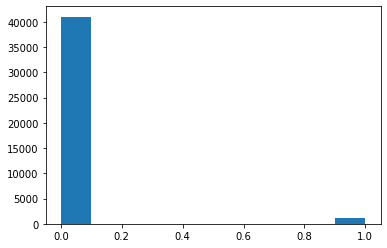

----------------------------------------------------------------------------------------------------
Value counts

0    41037
1     1063
Name: required_car_parking_space, dtype: int64
----------------------------------------------------------------------------------------------------


In [280]:
First_looking_on_feature(df_raw['required_car_parking_space'])

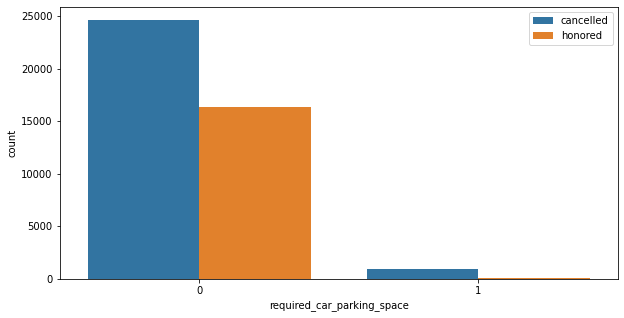

In [281]:
Sns_count_plot('required_car_parking_space')

In [282]:
FEATURES_TO_DROP.append('required_car_parking_space')
FEATURES_TO_DROP

['id', 'required_car_parking_space']

**Summary**

`Required car parking space` is useless and insignificant. 

Almost everyone decided to book accommodation without the parking space

One decided to drop it.

#### Room type reserved

Unique data:

    [0 2 3 1 4 5 6]
----------------------------------------------------------------------------------------------------
Histogram


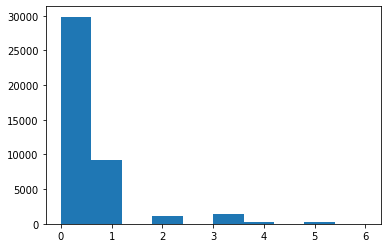

----------------------------------------------------------------------------------------------------
Value counts

0    29853
1     9135
3     1465
2     1131
4      320
5      190
6        6
Name: room_type_reserved, dtype: int64
----------------------------------------------------------------------------------------------------


In [283]:
First_looking_on_feature(df_raw['room_type_reserved'])

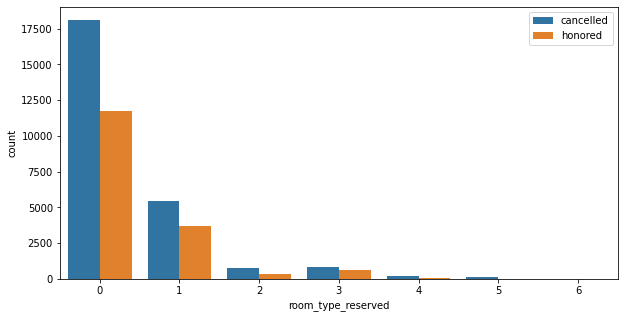

In [284]:
Sns_count_plot('room_type_reserved')

In [285]:
df_raw['room_type_reserved'] = df_raw.room_type_reserved.apply(lambda source: 3 if source > 3 else source)
df_raw['room_type_reserved'].value_counts()

0    29853
1     9135
3     1981
2     1131
Name: room_type_reserved, dtype: int64

In [286]:
CATEGORICAL_FEATURES.append('room_type_reserved')
CATEGORICAL_FEATURES

['no_of_adults',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'room_type_reserved']

**Summary**

`Room type reserved` looks 'OK'

#### Lead time

Unique data:

    [  9 117 315  32 258 215 320 265 189 137   1  69  50 217  58 143 188 155
 109  84   7   0 184  11 224 182 179 111  49  61 317  66  41 139 207 161
  25 147 110 208 148 223  47 275  40 129  34  94 221  51  59  95 133  12
 105 166   3 152  23  36 128  55 280  63  93  56  71 113  42 156   8  57
 160 118  30  10 102 132 168 198 138 107  20 159 150   6 134 172  77  33
  35 119 121 237  28 174 151 252   5 157 131 123 418 100  80 202   2  39
  27 122  67 196  16 245  68   4 335 178 219  14 116 177 153 175  54  75
  97 185  78 124 127 250  99  15 263  65  26  19  70 230  64 130  73 193
  46 183 180  22 164 256 162 141  43 101  37 273  76 200 146  87 181  24
 103 167 126 142 197  52 115 136  48  98  44  86 140 154 349  60 112 206
  53 106 171  91  13  89 259 192  83  45 292 163 203  74 186 377 222 187
 433  72  21  90  92 169 226 253 286 205 149  31 308  81 220  88 170 125
 104 120 244  82 216 194 158  96 190 240 285 291 322  62 268 213 346 108
 191 229 204  29 338  79  85  38 

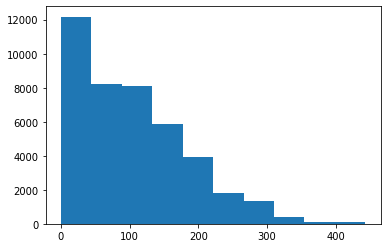

----------------------------------------------------------------------------------------------------
Value counts

1      846
0      827
2      502
6      498
3      480
      ... 
310      1
325      1
326      1
348      1
353      1
Name: lead_time, Length: 338, dtype: int64
----------------------------------------------------------------------------------------------------


In [287]:
First_looking_on_feature(df_raw['lead_time'])

Many variables which are better to segment and sort data values into bins. 

In [288]:
df_raw['lead_time'] = pd.cut(df_raw['lead_time'], 10, precision=0, labels=range(10)) 
# Because I have possibility to make numerical variables for bins so I use their (labels=range(10))

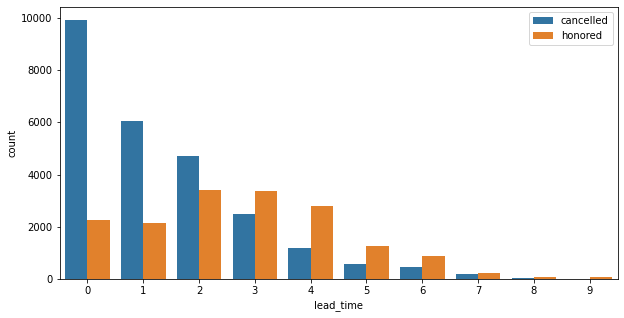

In [289]:
Sns_count_plot('lead_time')

If a booking was made in more advance it impacted on better result of `booking status`, i.e. *honored*

In [290]:
CATEGORICAL_FEATURES.append('lead_time')
CATEGORICAL_FEATURES

['no_of_adults',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'room_type_reserved',
 'lead_time']

**Summary**

It essential turned out to segment data values into bins

#### Arrival year

Unique data:

    [2018 2017]
----------------------------------------------------------------------------------------------------
Histogram


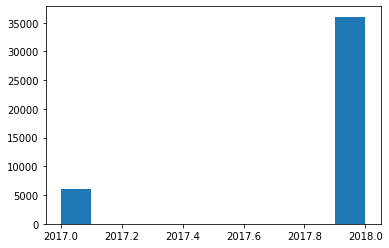

----------------------------------------------------------------------------------------------------
Value counts

2018    36050
2017     6050
Name: arrival_year, dtype: int64
----------------------------------------------------------------------------------------------------


In [291]:
First_looking_on_feature(df_raw['arrival_year'])

It looks like big inbalance data. This case can make that we will not see the seasonality of booking 

In [292]:
df_raw['arrival_year_month'] = df_raw['arrival_year'].astype(str) + '-' + df_raw['arrival_month'].astype(str)
df_raw['arrival_year_month'].value_counts()

2018-8     4933
2018-10    4719
2018-7     4274
2018-9     3838
2018-6     3349
2018-5     3284
2018-4     3002
2018-12    2302
2018-3     2198
2018-11    2155
2017-10    1734
2017-9     1310
2018-2     1196
2017-12    1089
2017-8      830
2018-1      800
2017-11     648
2017-7      407
2017-5        8
2017-6        7
2017-2        5
2017-1        5
2017-4        4
2017-3        3
Name: arrival_year_month, dtype: int64

Unfortunately, the first seven months look like the opening of a Hotel or a mistake. It is better to drop this part of the dataset.

It can be **black swan** that will disrupt machine learning

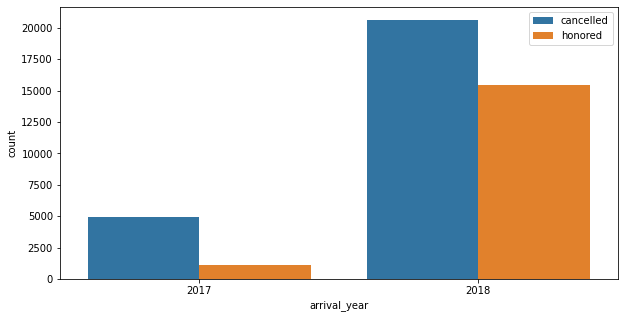

In [293]:
Sns_count_plot('arrival_year')

In [294]:
df_raw.drop('arrival_year_month', axis=1, inplace=True) # dropping a secondary column
df_raw.columns

Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [295]:
df_raw.drop(df_raw[df_raw['arrival_year'] == 2017].index, axis=0, inplace=True) # dropping rows related to arrival_year = 2017 

After that column of `arrival_year` is useless because it is composed of one variable (2018)

In [296]:
FEATURES_TO_DROP.append('arrival_year')
FEATURES_TO_DROP

['id', 'required_car_parking_space', 'arrival_year']

**Summary**

`arrival_year` was diminished. Rows related to `arrival_year` of 2017 was dropped.

`arrival_year` was dropped from the dataset

#### Arrival month

Unique data:

    [ 1  7 12 10  8  6  9  4 11  5  3  2]
----------------------------------------------------------------------------------------------------
Histogram


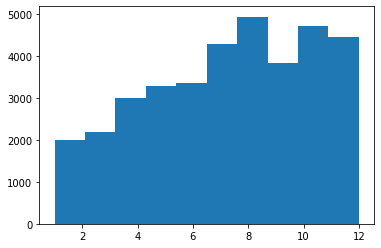

----------------------------------------------------------------------------------------------------
Value counts

8     4933
10    4719
7     4274
9     3838
6     3349
5     3284
4     3002
12    2302
3     2198
11    2155
2     1196
1      800
Name: arrival_month, dtype: int64
----------------------------------------------------------------------------------------------------


In [297]:
First_looking_on_feature(df_raw['arrival_month'])

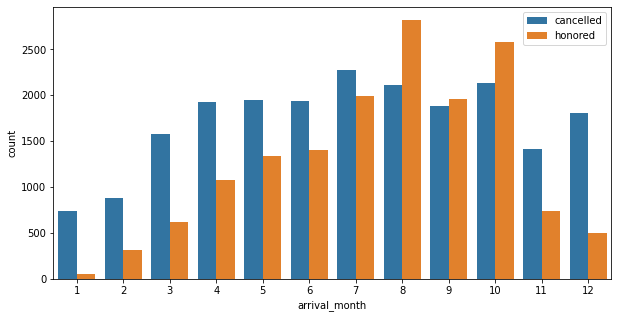

In [298]:
Sns_count_plot('arrival_month')

In [299]:
CATEGORICAL_FEATURES.append('arrival_month')
CATEGORICAL_FEATURES

['no_of_adults',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'room_type_reserved',
 'lead_time',
 'arrival_month']

**Summary**

`arrival_month` looks 'OK'

#### Arrival date

Unique data:

    [14 29  2  1 16  6 18 24  8 22 27 12 30 26  3 25 28 21  4 15 20 11  5 10
  7  9 23 19 31 17 13]
----------------------------------------------------------------------------------------------------
Histogram


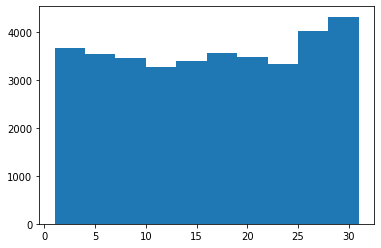

----------------------------------------------------------------------------------------------------
Value counts

27    1467
16    1334
28    1319
13    1289
26    1279
25    1272
2     1256
30    1253
6     1239
1     1239
8     1230
20    1193
17    1182
29    1169
3     1166
12    1165
4     1153
21    1151
15    1149
23    1148
5     1147
9     1146
19    1129
22    1121
11    1085
7     1084
24    1076
18    1050
10    1014
14     962
31     583
Name: arrival_date, dtype: int64
----------------------------------------------------------------------------------------------------


In [300]:
First_looking_on_feature(df_raw['arrival_date'])

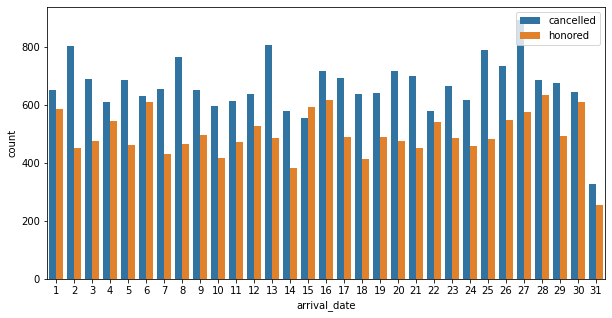

In [301]:
Sns_count_plot('arrival_date')

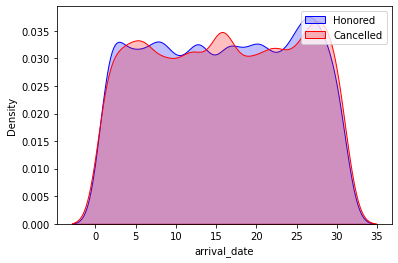

In [302]:
sns.kdeplot(df_raw[df_raw['booking_status'] == 0]['arrival_date'], color='b', shade=True, label='Honored')
sns.kdeplot(df_raw[df_raw['booking_status'] == 1]['arrival_date'], color='r', shade=True, label='Cancelled')
plt.legend()
plt.show()

The density is the same. The likelihood that a customer will decide to honor or cancel an accommodation on particular day is similar.

It can drop this feature. 

In [303]:
FEATURES_TO_DROP.append('arrival_date')
FEATURES_TO_DROP

['id', 'required_car_parking_space', 'arrival_year', 'arrival_date']

**Summary**

`arrival_date` was dropped because of low meaningful 

#### Market segment type

Unique data:

    [1 0 2 3 4]
----------------------------------------------------------------------------------------------------
Histogram


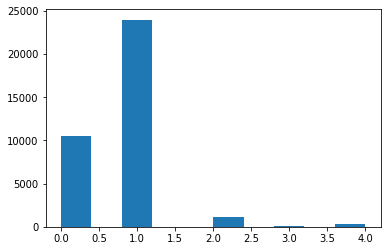

----------------------------------------------------------------------------------------------------
Value counts

1    23994
0    10527
2     1153
4      296
3       80
Name: market_segment_type, dtype: int64
----------------------------------------------------------------------------------------------------


In [304]:
First_looking_on_feature(df_raw['market_segment_type'])

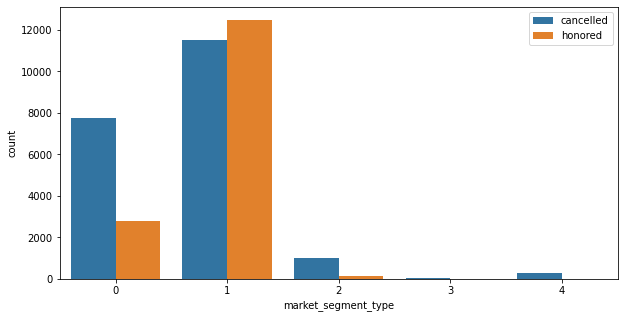

In [305]:
Sns_count_plot('market_segment_type')

In [306]:
df_raw.groupby(['market_segment_type','booking_status'])['id'].count()

market_segment_type  booking_status
0                    0                  7749
                     1                  2778
1                    0                 11518
                     1                 12476
2                    0                  1012
                     1                   141
3                    0                    62
                     1                    18
4                    0                   291
                     1                     5
Name: id, dtype: int64

Very important variables because of the viable distinguishes according to `booking_status` of `market_segment_type`

In [307]:
CATEGORICAL_FEATURES.append('market_segment_type')
CATEGORICAL_FEATURES

['no_of_adults',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'room_type_reserved',
 'lead_time',
 'arrival_month',
 'market_segment_type']

**Summary:**

I made a decision to leave this column in the original status

#### Repeated guest

Unique data:

    [1 0]
----------------------------------------------------------------------------------------------------
Histogram


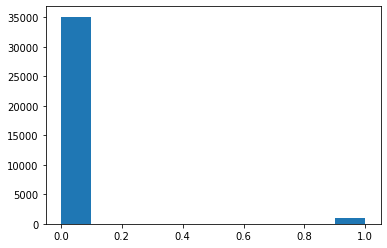

----------------------------------------------------------------------------------------------------
Value counts

0    35076
1      974
Name: repeated_guest, dtype: int64
----------------------------------------------------------------------------------------------------


In [308]:
First_looking_on_feature(df_raw['repeated_guest'])

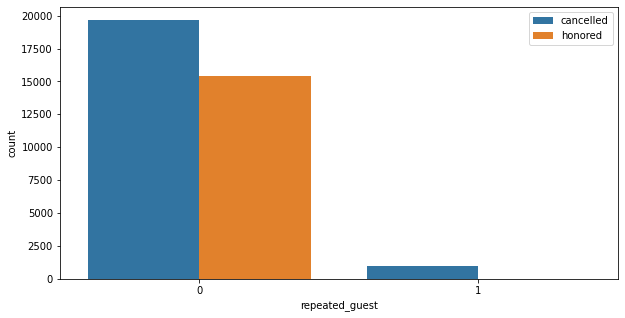

In [309]:
Sns_count_plot('repeated_guest')

In [333]:
rq_values = df_raw.groupby(['repeated_guest','booking_status'])['id'].count().values
print(f'Repeated guest - NO: {rq_values[1]/(rq_values[0]+rq_values[1])*100:.1f}% - rate of honored')
print(f'Repeated guest - YES: {rq_values[3]/(rq_values[2]+rq_values[3])*100:.1f}% - rate of honored')  

Repeated guest - NO: 43.9% - rate of honored
Repeated guest - YES: 1.0% - rate of honored


In [311]:
FEATURES_TO_DROP.append('repeated_guest')

**Summary:**

It is not important rate which ought to drop from my point of view

#### No of previous cancellations

Unique data:

    [11  0  4  1  2  3  8 13  6  5]
----------------------------------------------------------------------------------------------------
Histogram


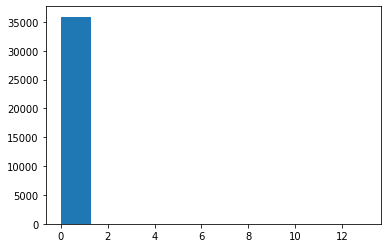

----------------------------------------------------------------------------------------------------
Value counts

0     35828
1        86
3        48
2        42
11       22
4        15
13        3
5         3
6         2
8         1
Name: no_of_previous_cancellations, dtype: int64
----------------------------------------------------------------------------------------------------


In [312]:
First_looking_on_feature(df_raw['no_of_previous_cancellations'])

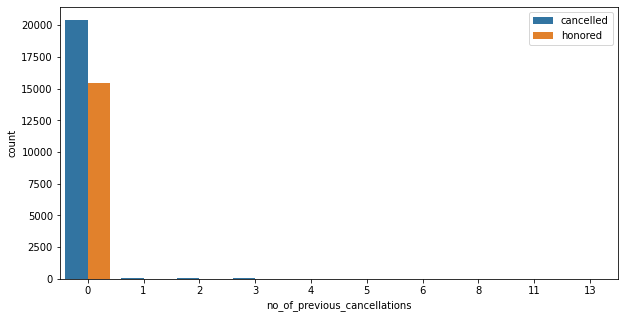

In [313]:
Sns_count_plot('no_of_previous_cancellations')

In [314]:
FEATURES_TO_DROP.append('no_of_previous_cancellations')
FEATURES_TO_DROP

['id',
 'required_car_parking_space',
 'arrival_year',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations']

**Summary**

Because of low rate of repeated_quest, no_of_previous_cancellations is useless and in this dataset cannot help. 

Regardless of upper statement almost the whole dataset related to guests, who intended to visit Hotel first time.

#### No of previous bookings not canceled

Unique data:

    [ 0  2  3 23 47  7  8 14  4  6 13  1 12  5 33 16 18 10 11 27 17 21 30 43
 44 24 35  9 37 20 41 46 32 36 22 26 19 48 28 58 25 15]
----------------------------------------------------------------------------------------------------
Histogram


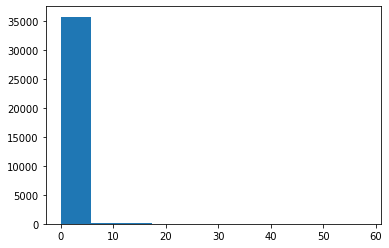

----------------------------------------------------------------------------------------------------
Value counts

0     35116
1       203
2       117
3        95
5        75
4        75
6        46
7        43
8        43
11       36
10       29
12       23
18       21
9        16
16       14
13       10
14        9
20        9
23        6
32        5
35        5
24        4
46        4
21        4
17        4
27        4
33        4
36        3
30        3
48        3
47        3
43        3
26        2
58        2
19        2
44        2
37        2
22        1
41        1
28        1
25        1
15        1
Name: no_of_previous_bookings_not_canceled, dtype: int64
----------------------------------------------------------------------------------------------------


In [315]:
First_looking_on_feature(df_raw['no_of_previous_bookings_not_canceled'])

It is the same matter like previous case related to `no_of_previous_cancellations`

This feature will be dropped

In [316]:
FEATURES_TO_DROP.append('no_of_previous_bookings_not_canceled')
FEATURES_TO_DROP

['id',
 'required_car_parking_space',
 'arrival_year',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled']

**Summary**

This feature was dropped

#### Avg price per room	

Unique data:

    [67.5  72.25 52.   ... 86.07 93.7  44.  ]
----------------------------------------------------------------------------------------------------
Histogram


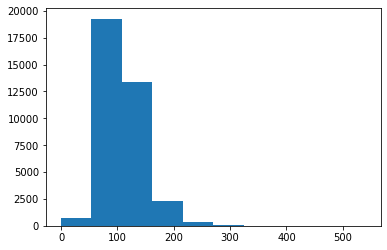

----------------------------------------------------------------------------------------------------
Value counts

75.00     1076
80.75      902
90.95      748
90.00      737
105.30     632
          ... 
79.36        1
116.59       1
152.79       1
86.08        1
44.00        1
Name: avg_price_per_room, Length: 2170, dtype: int64
----------------------------------------------------------------------------------------------------


In [317]:
First_looking_on_feature(df_raw['avg_price_per_room'])

In [318]:
df_raw[df_raw['avg_price_per_room'] == 0]['id'].count()

374

It is a mistake probably that there are 374 rows which have 0 of `avg_price_per_room`

I will change these prices on median. Next `avg_price_per_room` will be segmented into bins

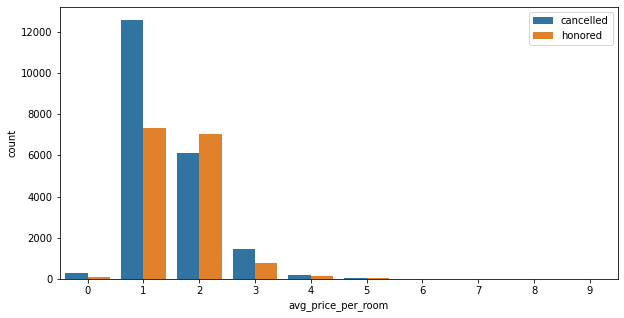

1    19919
2    13142
3     2261
0      352
4      322
5       43
6        6
9        5
7        0
8        0
Name: avg_price_per_room, dtype: int64

In [319]:
df_raw['avg_price_per_room'] = df_raw.avg_price_per_room.apply(lambda source: np.median(df_raw['avg_price_per_room']) if source == 0 else source)
df_raw['avg_price_per_room'] = pd.cut(df_raw['avg_price_per_room'], 10, precision=0, labels=range(10))
Sns_count_plot('avg_price_per_room')
df_raw['avg_price_per_room'].value_counts()

It turns out that 5 group of `avg_price_per_room` is sufficient so 5th, 6th, 7th, 8th group will be changed on 4th group.

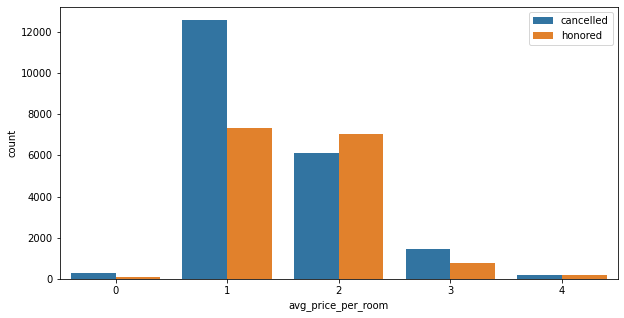

1    19919
2    13142
3     2261
4      376
0      352
Name: avg_price_per_room, dtype: int64

In [320]:
df_raw['avg_price_per_room'] = df_raw.avg_price_per_room.apply(lambda source: 4 if source > 4 else source)
Sns_count_plot('avg_price_per_room')
df_raw['avg_price_per_room'].value_counts()

In [321]:
CATEGORICAL_FEATURES.append('avg_price_per_room')
CATEGORICAL_FEATURES

['no_of_adults',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'room_type_reserved',
 'lead_time',
 'arrival_month',
 'market_segment_type',
 'avg_price_per_room']

**Summary**

It was made a range of changes like segmentation and changing of groups  

#### No of special requests

Unique data:

    [0 1 2 3 4 5]
----------------------------------------------------------------------------------------------------
Histogram


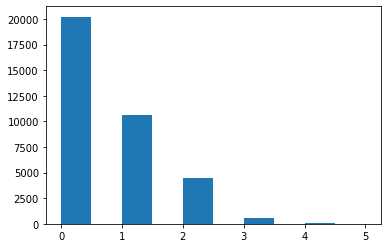

----------------------------------------------------------------------------------------------------
Value counts

0    20222
1    10667
2     4503
3      568
4       89
5        1
Name: no_of_special_requests, dtype: int64
----------------------------------------------------------------------------------------------------


In [322]:
First_looking_on_feature(df_raw['no_of_special_requests'])

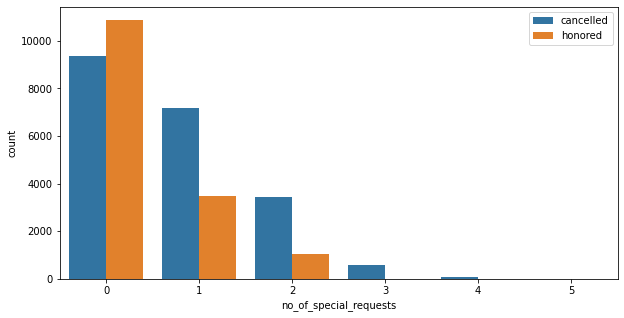

In [323]:
Sns_count_plot('no_of_special_requests')

It can notice the visible trend that guests who do not have a special request, they are more tendency to honor their accomodation. 

This feature can be changed to binary variables, i.e.:
* 0 - without special requests
* 1 - with special requests

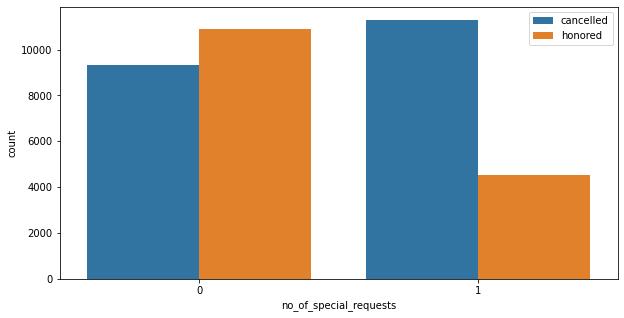

In [324]:
df_raw['no_of_special_requests'] = df_raw.no_of_special_requests.apply(lambda source: 1 if source > 1 else source)
Sns_count_plot('no_of_special_requests')

**Summary**

This variables were changed to binary variables, i.e.:

* 0 - without special requests
* 1 - with special requests

### Booking status - the objective of predicting

Unique data:

    [0 1]
----------------------------------------------------------------------------------------------------
Histogram


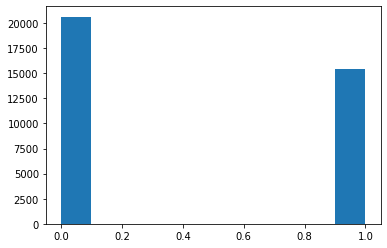

----------------------------------------------------------------------------------------------------
Value counts

0    20632
1    15418
Name: booking_status, dtype: int64
----------------------------------------------------------------------------------------------------


In [325]:
First_looking_on_feature(df_raw['booking_status'])

<function matplotlib.pyplot.show(close=None, block=None)>

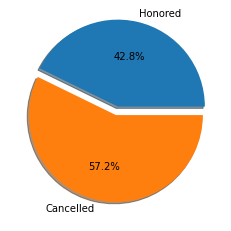

In [326]:
sizes = [df_raw.booking_status[df_raw['booking_status'] == 1].count(), df_raw.booking_status[df_raw['booking_status'] == 0].count()]
explode = (0.1, 0)
labels = 'Honored', 'Cancelled'
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()

**Summary**

`booking_status` is balanced and it can remain it in the original form. 

### Remove redundant columns

In [327]:
FEATURES_TO_DROP

['id',
 'required_car_parking_space',
 'arrival_year',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled']

In [328]:
df = df_raw.drop(labels=FEATURES_TO_DROP, axis=1)
df.shape

(36050, 12)

### Convert all categorical features into dummy variables

In [329]:
CATEGORICAL_FEATURES

['no_of_adults',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'room_type_reserved',
 'lead_time',
 'arrival_month',
 'market_segment_type',
 'avg_price_per_room']

In [330]:
df_enc = pd.get_dummies(data=df, columns=CATEGORICAL_FEATURES, drop_first=False)
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36050 entries, 0 to 42098
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   no_of_children          36050 non-null  int64
 1   type_of_meal_plan       36050 non-null  int64
 2   no_of_special_requests  36050 non-null  int64
 3   booking_status          36050 non-null  int64
 4   no_of_adults_1          36050 non-null  uint8
 5   no_of_adults_2          36050 non-null  uint8
 6   no_of_adults_3          36050 non-null  uint8
 7   no_of_weekend_nights_0  36050 non-null  uint8
 8   no_of_weekend_nights_1  36050 non-null  uint8
 9   no_of_weekend_nights_2  36050 non-null  uint8
 10  no_of_week_nights_0     36050 non-null  uint8
 11  no_of_week_nights_1     36050 non-null  uint8
 12  no_of_week_nights_2     36050 non-null  uint8
 13  no_of_week_nights_3     36050 non-null  uint8
 14  no_of_week_nights_4     36050 non-null  uint8
 15  no_of_week_nights_5

### Scale variables 

Scale is not necessary because all variables are binary

## Saving the prepared data for machine learning

In [331]:
X = df_enc.drop('booking_status', axis=1)
y = df_enc['booking_status']

print(f'X: {X.shape}, y: {y.shape}')

X: (36050, 51), y: (36050,)


In [332]:
X.to_csv('X_ml.csv', sep=',', index=False)
y.to_csv('y_ml.csv', sep=',', index=False)

The next step is machine learning. 
It is available herewith: 
[Jupyter-notebook](ML_Datascience10092022_AmadeuszMinta.ipynb)